# Homework 1: Sine wave generation and binary classification

## Part A - Sine Wave Generation

### Setup
To complete this part, install the required Python libraries:

In [20]:
import numpy as np
from scipy.io import wavfile

import numpy as np
import glob
from mido import MidiFile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import math
import re
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [21]:
# (installation process may be different on your system)
# You don't need to use these libraries, so long as you implement the specified functions
# !pip install numpy
# !pip install scipy
# !pip install IPython
# !pip install glob
# !pip install scikit-learn
# !pip install mido

1. Write a function that converts a musical note name to its corresponding frequency in Hertz (Hz)

`note_name_to_frequency()`
- **Input**: A string `note_name` combining a note (e.g., `'C'`, `'C#'`, `'D'`, `'D#'`, `'E'`, `'F'`, `'F#'`, `'G'`, `'G#'`, `'A'`, `'A#'`, `'B'`) and an octave number (`'0'` to `'10'`)
- **Output**: A float representing the frequency in Hz
- **Details**:
  - Use A4 = 440 Hz as the reference frequency
  - Frequencies double with each octave increase (e.g., A5 = 880 Hz) and halve with each decrease (e.g., A3 = 220 Hz)

- **Examples**:
  - `'A4'` → `440.0`
  - `'A3'` → `220.0`
  - `'G#4'` → `415.3047`

In [22]:
# 1. Write a function that converts a musical note name to its corresponding frequency in Hertz (Hz)
SAMPLE_RATE = 44100

def note_name_to_frequency(note):
    NOTE_FREQUENCIES = {
        'C': 16.35,
        'C#': 17.32,
        'D': 18.35,
        'D#': 19.45,
        'E': 20.60,
        'F': 21.83,
        'F#': 23.12,
        'G': 24.50,
        'G#': 25.96,
        'A': 27.50,
        'A#': 29.14,
        'B': 30.87,
    }
    extract = re.split('(\d+)', note)


    note = extract[0]
    octave = float(extract[1])

    base_frequency = NOTE_FREQUENCIES[note]
    frequency = base_frequency * 2 ** (octave)

    return frequency

test_notes = ['A3', 'A2', 'C#4']
for note in test_notes:
    print(note_name_to_frequency(note))

220.0
110.0
277.12


2. Write a function that linearly decreases the amplitude of a given waveform

`decrease_amplitude()`
- **Inputs**:
  - `audio`: A NumPy array representing the audio waveform at a sample rate of 44100 Hz
- **Output**: A NumPy array representing the audio waveform at a sample rate of 44100 Hz
- **Details**:
  - The function must linearly decrease the amplitude of the input audio. The amplitude should start at 1 (full volume) and decrease gradually to 0 (silence) by the end of the sample

In [ ]:
def decrease_amplitude(audio):
    # Q2: Your code goes here
    decreasing_audio = np.linspace(1, 0, len(audio)) * audio

    return decreasing_audio

test [ 0.00000000e+00  1.25044852e-01  2.48115340e-01 ... -3.33193881e-05
 -1.12539275e-05 -0.00000000e+00]


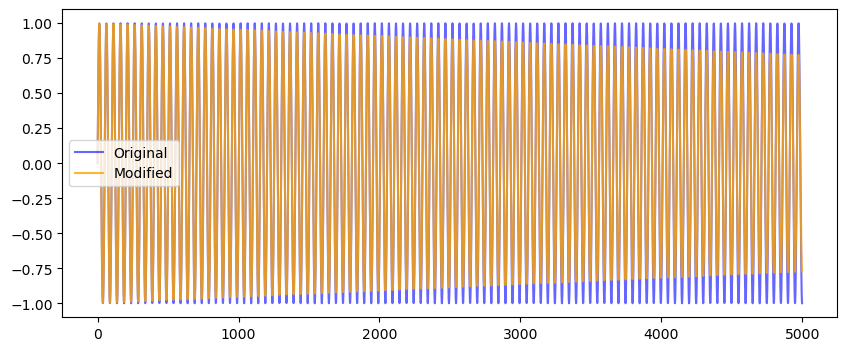

In [45]:
def vis(audio1, audio2, ran):
    plt.figure(figsize=(10, 4))
    plt.plot(audio1[:ran], label="Original", color='blue', alpha=0.6)
    plt.plot(audio2[:ran], label="Modified", color='orange', alpha=0.8)
    plt.legend()
    plt.show()
    
def testQ2():
    duration = 0.5 # in seconds
    sample_rate = 44100
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    audio = np.sin(2 * np.pi * 880 * t) # A5 tone

    faded_audio = decrease_amplitude(audio)
    
    vis(audio, faded_audio, 5000)

testQ2()

In [46]:
# Can use these for visualization if you like, though the autograder won't use ipython
#
from IPython.display import Audio, display

print("Example Input Audio:")
display(Audio(filename = "input.wav", rate=44100))

print("Example Output Audio:")
display(Audio(filename = "output.wav", rate=44100))

Example Input Audio:


Example Output Audio:


3. Write a function that adds a delay effect to a given audio where the output is a combination of the original audio and a delayed audio

`add_delay_effects()`  
- **Inputs**:  
  - `audio`: A NumPy array representing the audio waveform, sampled at 44,100 Hz
- **Output**:  
  - A NumPy array representing the modified audio waveform, sampled at 44,100 Hz
- **Details**:
  - The amplitude of the delayed audio should be 30% of the original audio's amplitude
  - The amplitude of the original audio should be adjusted to 70% of the original audio's amplitude
  - The output should combine the original audio (with the adjusted amplitude) with a delayed version of itself
  - The delayed audio should be offset by 0.5 seconds behind the original audio

- **Examples**:
  - The provided files (input.wav and output.wav) provide examples of input and output audio

In [67]:
def add_delay_effects(audio):
    #Q3: Your code goes here
    delayed_audio = 0.3 * audio
    original_audio = 0.7 * audio
    combined = delayed_audio + original_audio
    
    # offset the delayed audio by 0.5 seconds
    delay_offset = int(0.5 * SAMPLE_RATE)
    delayed_audio = np.concatenate((np.zeros(delay_offset), delayed_audio[:-delay_offset]))
    print('delay-offset', delay_offset)

    return delayed_audio

delay-offset 22050


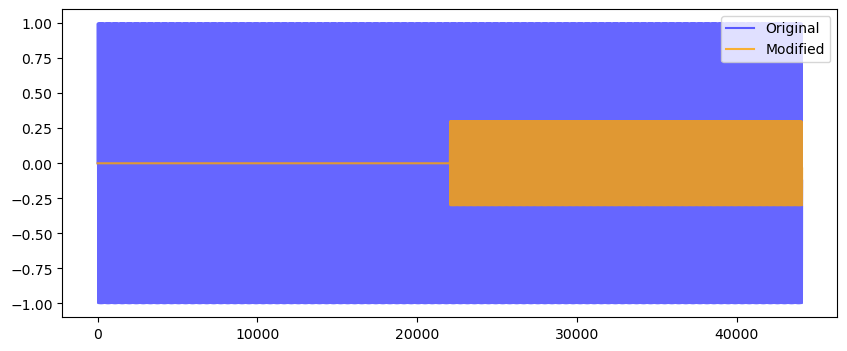

In [68]:
def testQ3():
    duration = 1.0  # in seconds
    sample_rate = 44100
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    audio = np.sin(2 * np.pi * 880 * t)  # A5 tone

    delayed_audio = add_delay_effects(audio)
    
    vis(audio, delayed_audio, int(sample_rate * duration))

testQ3()

4. Write a function that concatenates a list of audio arrays sequentially and a function that mixes audio arrays by scaling and summing them, simulating simultaneous playback

`concatenate_audio()`
- **Input**:
  - `list_of_your_audio`: A list of NumPy arrays (e.g., `[audio1, audio2]`), each representing audio at 44100 Hz
- **Output**: A NumPy array of the concatenated audio
- **Example**:
  - If `audio1` is 2 seconds (88200 samples) and `audio2` is 1 second (44100 samples), the output is 3 seconds (132300 samples)

`mix_audio()`
- **Inputs**:
  - `list_of_your_audio`: A list of NumPy arrays (e.g., `[audio1, audio2]`), all with the same length at 44100 Hz.
  - `amplitudes`: A list of floats (e.g., `[0.2, 0.8]`) matching the length of `list_of_your_audio`
- **Output**: A NumPy array representing the mixed audio
- **Example**:
  - If `audio1` and `audio2` are 2 seconds long, and `amplitudes = [0.2, 0.8]`, the output is `0.2 * audio1 + 0.8 * audio2`

In [73]:
def concatenate_audio(list_of_your_audio):
    #Q4: Your code goes here
    concatenated_audio = np.concatenate(list_of_your_audio)
    return concatenated_audio

In [88]:
def mix_audio(list_of_your_audio, amplitudes):
    #Q4: Your code goes here
    mixed_audio = np.zeros_like(list_of_your_audio[0])

    for audio, amplitude in zip(list_of_your_audio, amplitudes):
        mixed_audio += audio * amplitude
    
    return mixed_audio

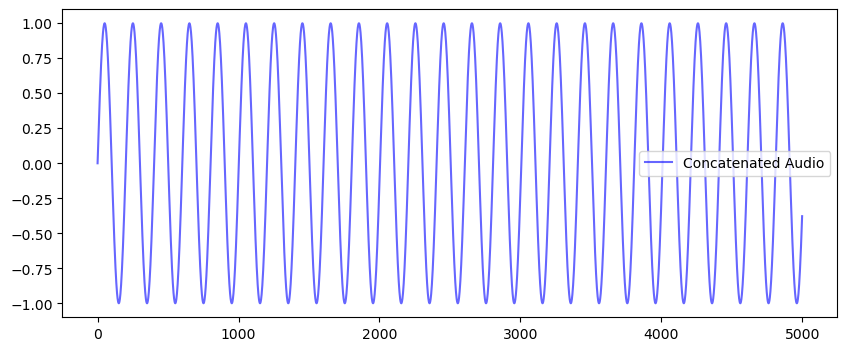

In [89]:
def testQ4a():
    duration = 0.5 # in seconds
    sample_rate = 44100
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    audio1 = np.sin(2 * np.pi * 220 * t) # A3 tone
    audio2 = np.sin(2 * np.pi * 880 * t) # A5 tone

    concat_audio = concatenate_audio([audio1, audio2])
    
    # Visualize here...
    plt.figure(figsize=(10, 4))
    plt.plot(concat_audio[:5000], label="Concatenated Audio", color='blue', alpha=0.6)
    plt.legend()
    plt.show()
    # Play the audio
    display(Audio(concat_audio, rate=44100))

testQ4a()

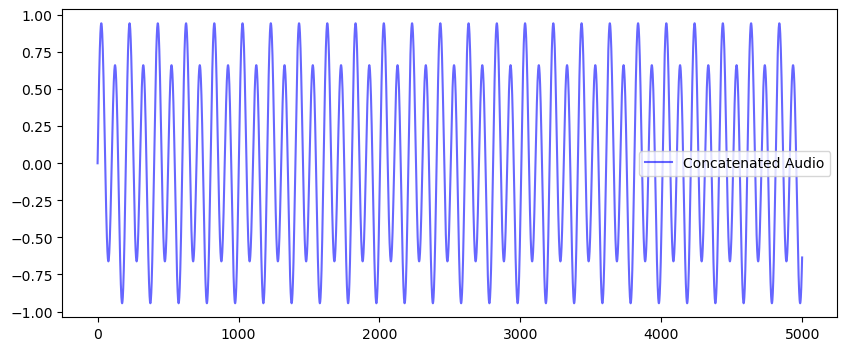

In [90]:
def testQ4b():
    duration = 0.8  # in seconds
    sample_rate = 44100
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    audio1 = np.sin(2 * np.pi * 220 * t) # A3 tone
    audio2 = np.sin(2 * np.pi * 440 * t) # A4 tone

    mix_audio1 = mix_audio([audio1, audio2], [0.2, 0.8])
    
    # Visualize here...
    plt.figure(figsize=(10, 4))
    plt.plot(mix_audio1[:5000], label="Concatenated Audio", color='blue', alpha=0.6)
    plt.legend()
    plt.show()
    # Play the audio
    display(Audio(mix_audio1, rate=44100))

testQ4b()

5. Modify your solution to Q2 so that your pipeline can generate sawtooth waves by adding harmonics based on the following equation:

    $\text{sawtooth}(f, t) = \frac{2}{\pi} \sum_{k=1}^{19} \frac{(-1)^{k+1}}{k} \sin(2\pi k f t)$ 

- **Inputs**:
  - `frequency`: Fundamental frequency of sawtooth wave
  - `duration`: A float representing the duration in seconds (e.g., 2.0)
- **Output**: A NumPy array representing the audio waveform at a sample rate of 44100 Hz

In [94]:
def create_sawtooth_wave(frequency, duration, sample_rate=44100):
    #Q5: Your code goes here
    t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    sawtooth = np.zeros_like(t)

    for k in range(1, 20):
        sawtooth += ((-1) ** (k + 1)) / k * np.sin(2 * np.pi * k * frequency * t)

    sawtooth += 2 / np.pi

    return sawtooth

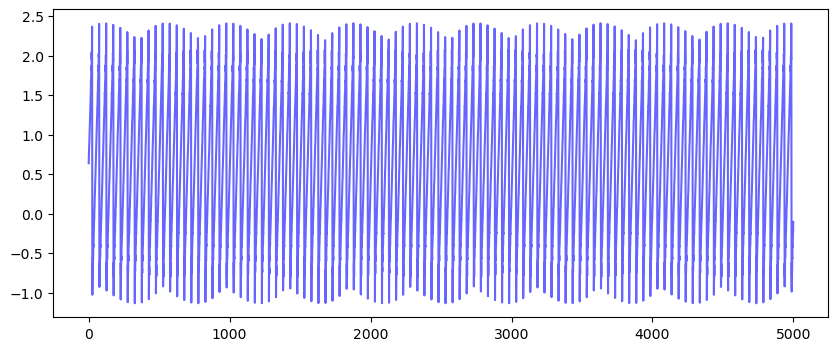

In [96]:
def testQ5():
    yours = create_sawtooth_wave(440, 2.0, 22050)
    
    plt.figure(figsize=(10, 4))
    plt.plot(yours[:5000], label="sawtooth", color='blue', alpha=0.6)
    plt.show()

testQ5()

## Part B - Binary Classification
Train a binary classification model using `scikit-learn` to distinguish between piano and drum MIDI files.

#### Unzip MIDI Files
Extract the provided MIDI datasets:

```bash
unzip piano.zip
unzip drums.zip
```

- `./piano`: Contains piano MIDI files (e.g., `0000.mid` to `2154.mid`)
- `./drums`: Contains drum MIDI files (e.g., `0000.mid` to `2154.mid`)
- Source: [Tegridy MIDI Dataset] (https://github.com/asigalov61/Tegridy-MIDI-Dataset)

These folders should be extracted into the same directory as your solution file

6. Write functions to compute simple statistics about the files

####  `get_stats()`

- **Inputs**:
  - `piano_file_paths`: List of piano MIDI file paths`
  - `drum_file_paths`: List of drum MIDI file paths`
- **Output**: A dictionary:
  - `"piano_midi_num"`: Integer, number of piano files
  - `"drum_midi_num"`: Integer, number of drum files
  - `"average_piano_beat_num"`: Float, average number of beats in piano files
  - `"average_drum_beat_num"`: Float, average number of beats in drum files
- **Details**:
  - For each file:
    - Load with `MidiFile(file_path)`
    - Get `ticks_per_beat` from `mid.ticks_per_beat`
    - Compute total ticks as the maximum cumulative `msg.time` (delta time) across tracks
    - Number of beats = (total ticks / ticks_per_beat)
  - Compute averages, handling empty lists (return 0 if no files)

In [10]:
def get_file_lists():
    piano_files = sorted(glob.glob("./piano/*.mid"))
    drum_files = sorted(glob.glob("./drums/*.mid"))
    return piano_files, drum_files

def get_num_beats(file_path):
    # Q6: Your code goes here
    mid = MidiFile(file_path)
    # Might need: mid.tracks, msg.time, mid.ticks_per_beat
    return nBeats

def get_stats(piano_path_list, drum_path_list):
    piano_beat_nums = []
    drum_beat_nums = []
    for file_path in piano_path_list:
        piano_beat_nums.append(get_num_beats(file_path))
        
    for file_path in drum_path_list:
        drum_beat_nums.append(get_num_beats(file_path))
    
    return {"piano_midi_num":len(piano_path_list),
            "drum_midi_num":len(drum_path_list),
            "average_piano_beat_num":np.average(piano_beat_nums),
            "average_drum_beat_num":np.average(drum_beat_nums)}

7. Implement a few simple feature functions, to compute the lowest and highest MIDI note numbers in a file, and the set of unique notes in a file

`get_lowest_pitch()` and `get_highest_pitch()`
functions to find the lowest and highest MIDI note numbers in a file

- **Input**: `file_path`, a string (e.g., `"./piano/0000.mid"`)
- **Output**: An integer (0–127) or `None` if no notes exist
- **Details**:
  - Use `MidiFile(file_path)` and scan all tracks
  - Check `msg.type == 'note_on'` and `msg.velocity > 0` for active notes
  - Return the minimum (`get_lowest_pitch`) or maximum (`get_highest_pitch`) `msg.note`

`get_unique_pitch_num()`
a function to count unique MIDI note numbers in a file

- **Input**: `file_path`, a string
- **Output**: An integer, the number of unique pitches
- **Details**:
  - Collect `msg.note` from all `'note_on'` events with `msg.velocity > 0` into a set
  - Return the set’s length
- **Example**: For notes `["C4", "C4", "G4", "G4", "A4", "A4", "G4"]`, output is 3 (unique: C4, G4, A4)

In [11]:
def get_lowest_pitch(file_path):
    #Q7-1: Your code goes here
    pass

def get_highest_pitch(file_path):
    #Q7-2: Your code goes here
    pass

def get_unique_pitch_num(file_path):
    #Q7-3: Your code goes here
    pass

8. Implement an additional feature extraction function to compute the average MIDI note number in a file

`get_average_pitch_value()`
a function to return the average MIDI note number from a file

- **Input**: `file_path`, a string
- **Output**: A float, the average value of MIDI notes in the file
- **Details**:
  - Collect `msg.note` from all `'note_on'` events with `msg.velocity > 0` into a set
- **Example**: For notes `[51, 52, 53]`, output is `52`

In [12]:
def get_average_pitch_value(file_path):
    #Q8: Your code goes here
    pass

9. Construct your dataset and split it into train and test sets using `scikit-learn` (most of this code is provided). Train your model to classify whether a given file is intended for piano or drums.

`featureQ9()`

Returns a feature vector concatenating the four features described above

- **Input**: `file_path`, a string.
- **Output**: A vector of four features

In [13]:
def featureQ9(file_path):
    # Already implemented: this one is a freebie if you got everything above correct!
    return [get_lowest_pitch(file_path),
            get_highest_pitch(file_path),
            get_unique_pitch_num(file_path),
            get_average_pitch_value(file_path)]

10. Creatively incorporate additional features into your classifier to make your classification more accurate.  Include comments describing your solution.

In [14]:
def featureQ10(file_path):
    #Q10: Your code goes here
    return []